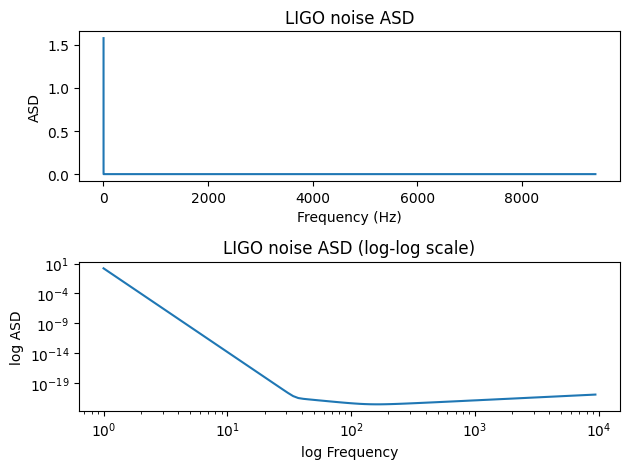

In [1]:

import numpy as np
import matplotlib.pyplot as plt

'Load and analyze the provided data file------------'

# Load the data from the text file
data = np.loadtxt('.\data\iLIGOSensitivity.txt')

# Extract the sampling times and data values from the data
frequency = data[:, 0]
sqrt_psd = data[:, 1]

#plot the data
fig, axs = plt.subplots(2, 1)

# Plot 1
axs[0].plot(frequency, sqrt_psd)
axs[0].set_title('LIGO noise ASD')
axs[0].set_xlabel('Frequency (Hz)')
axs[0].set_ylabel('ASD')

# Plot 2 on log-log scale
axs[1].loglog(frequency, sqrt_psd)
axs[1].set_title('LIGO noise ASD (log-log scale)')
axs[1].set_xlabel('log Frequency')
axs[1].set_ylabel('log ASD')

plt.tight_layout()
plt.show()

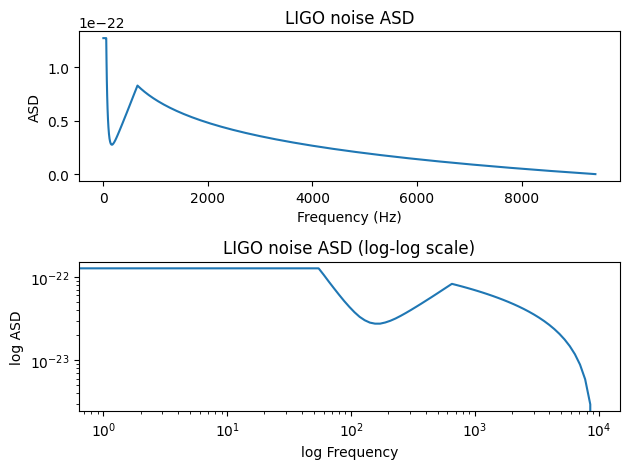

Sampling frequency: 18824.68 Hz


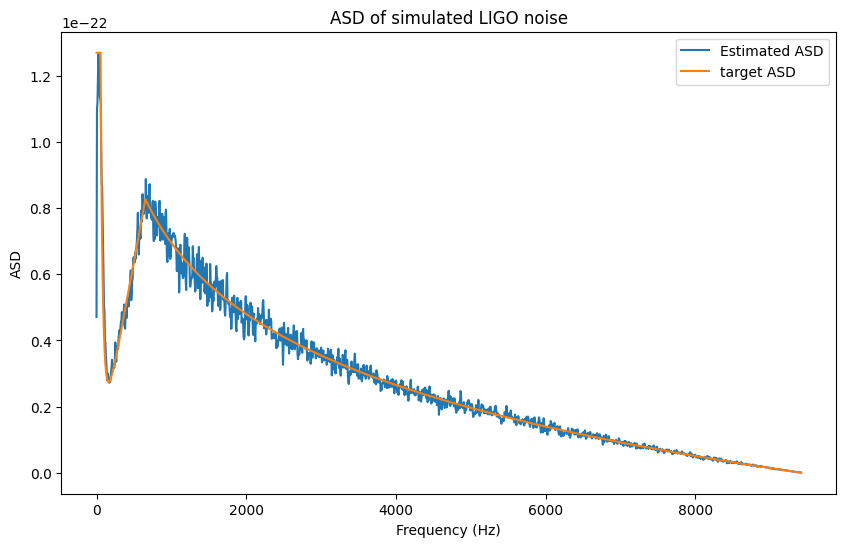

In [2]:
import numpy as np
from scipy import signal

def colorednoisegeneration(n_samples,freq_vec, sqrt_psd , samp_freq):
    # Design FIR filter using firwin2 
    fltr_order =500
    b = signal.firwin2(fltr_order + 1, freq_vec, sqrt_psd, fs=samp_freq)

    # Generate white Gaussian noise realization
    in_noise = np.random.randn(n_samples)
    
    # Pass through the designed filter and scale
    out_noise = np.sqrt(samp_freq) * signal.fftconvolve(in_noise,b, mode='same')
    return out_noise

## Modify the ASD to be constant below 50 Hz and linearly decrease to zero from 700 Hz to the Nyquist frequency

for i in range(len(sqrt_psd)):
    if frequency[i] >= 50:
        index_f50= i
        break
for i in range(len(sqrt_psd) - 1, -1, -1): 
    if frequency[i] <= 700:
        index_f700 = i
        break

interval=sqrt_psd[index_f700]/(len(sqrt_psd)-1- index_f700)

m=0
for i in range(len(sqrt_psd)):
    if frequency[i] <= 50:
        sqrt_psd[i] = sqrt_psd[index_f50]
    elif frequency[i] >= 700:
        m=m+1
        sqrt_psd[i] = sqrt_psd[index_f700]- interval * m

frequency = np.concatenate(([0], frequency))
sqrt_psd = np.concatenate(([sqrt_psd[0]], sqrt_psd))

##plot changed ASD
fig, axs = plt.subplots(2, 1)
# Plot 1
axs[0].plot(frequency, sqrt_psd)
axs[0].set_title('LIGO noise ASD')
axs[0].set_xlabel('Frequency (Hz)')
axs[0].set_ylabel('ASD')
# Plot 2 on log-log scale
axs[1].loglog(frequency, sqrt_psd)
axs[1].set_title('LIGO noise ASD (log-log scale)')
axs[1].set_xlabel('log Frequency')
axs[1].set_ylabel('log ASD')
plt.tight_layout()
plt.show()

## Generate a noise realization using the modified ASD
samp_freq=2*frequency[-1]
print(f"Sampling frequency: {samp_freq} Hz")
n_samples = 100000
noise_ligo=colorednoisegeneration(n_samples,frequency, sqrt_psd , samp_freq)

# Estimate the PSD using Welch's method
f, pxx = signal.welch(noise_ligo, samp_freq, nperseg=3000)

# Plot the estimated ASD
plt.figure(figsize=(10, 6))
plt.plot(f, np.sqrt(pxx/2),label='Estimated ASD')
plt.plot(frequency,sqrt_psd, label='target ASD')
plt.xlabel('Frequency (Hz)')
plt.ylabel('ASD')
plt.title('ASD of simulated LIGO noise')
plt.legend() 
plt.show()


